In [13]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data = data.drop(['street', 'date', 'statezip'], axis=1)
y = data['price']
data = data.drop('price', axis=1)

In [7]:
for i in data:
    print(f" {i} : {data[i].unique()} . size : {len(data[i].unique())}")

 bedrooms : [3. 5. 4. 2. 6. 7. 9. 1. 8. 0.] . size : 10
 bathrooms : [1.5  2.5  2.   2.25 1.   1.75 2.75 3.   3.25 3.5  8.   4.25 4.   3.75
 5.   4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 0.   6.75] . size : 26
 sqft_living : [ 1340  3650  1930  2000  1940   880  1350  2710  2430  1520  1710  2920
  2330  1090  2910  1200  1570  3110  1370  1180  2240  1450  1750  2730
  1600  2090  2360  2200  2820  2600  1560  2860  1820  3630  3240   800
  1850  1960  2390  1580  1480   850  1770  1210  1160  1970  1270  3310
  1800  2210  1920  2190  3660  1320  1630  2680  2540   900  1650  1010
  2530  2850  2280  1900  1330  2170  2120  2490  1990  3690  2340  2110
  1140  1410  3180  2160  2350  2740  1680  3090  4010  2010  2370  1840
  2070  4340   840  1240  1390  2310  1050  2550  1120  2230   810  3190
  1670 13540  1880  1550  2050  2220  2300  1790  2440  3400  4420  1571
  1620  1408  3040  4490  1590  2450  1440  1100  2150  1490  1030   720
  2020  1300  3370  1890  1260  3470  229

In [8]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [39]:
markers = ["o", ">", "s", "p", "P", "*", "X", "D"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

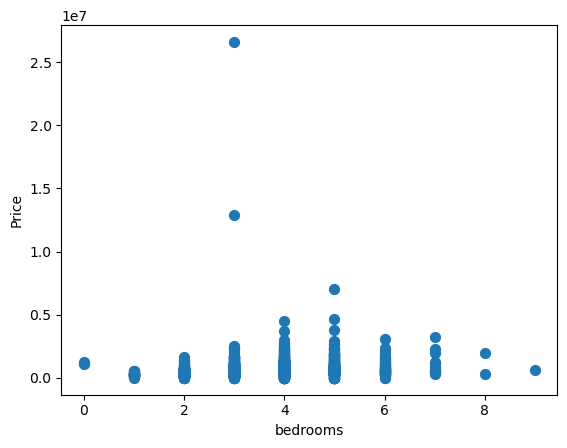

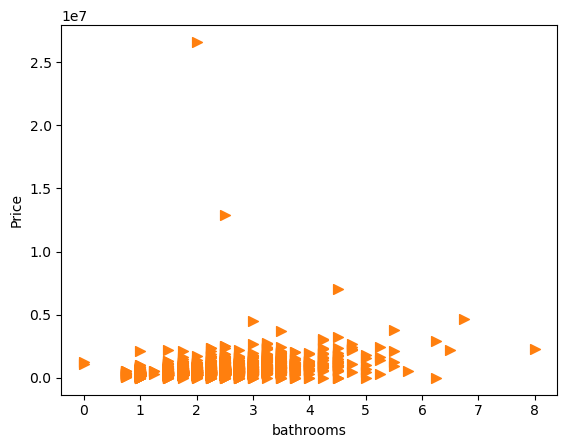

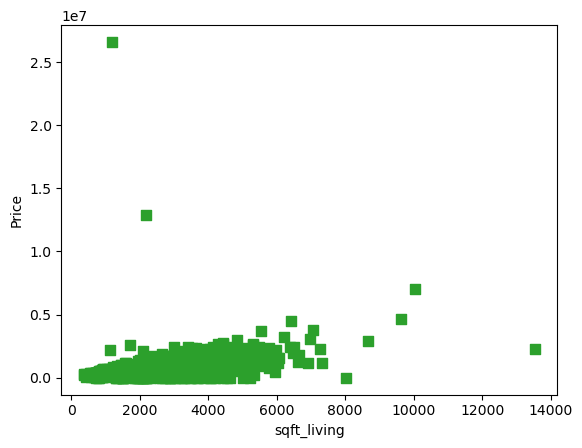

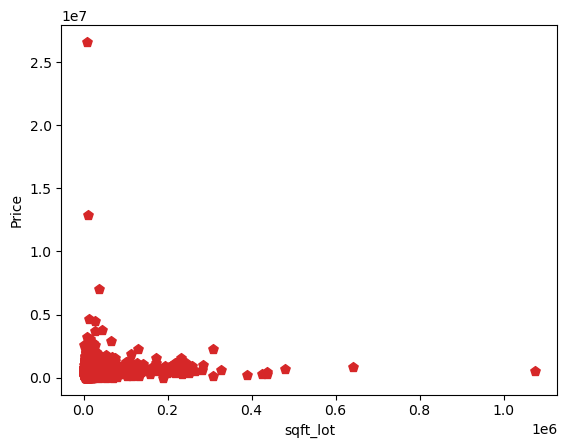

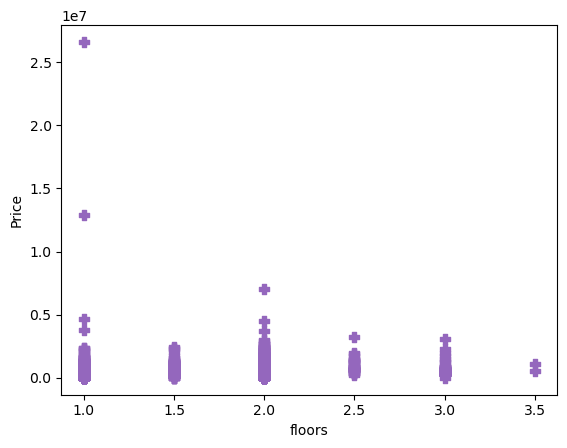

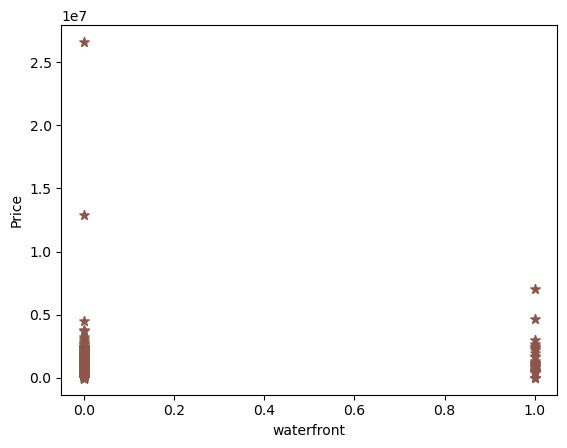

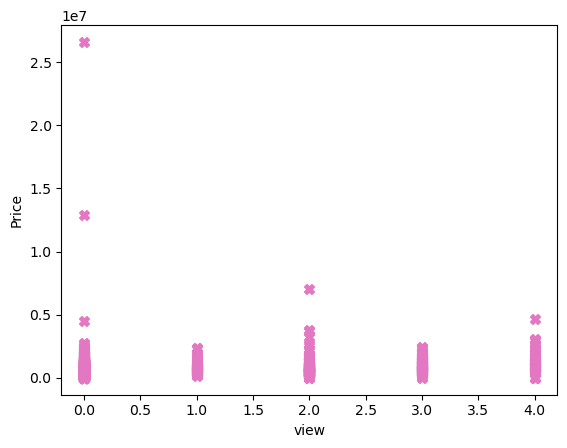

In [44]:
for i in range(0,7):
    plt.scatter(data[data.columns[i]], y, s=50, c=colors[i], marker=markers[i])
    plt.xlabel(data.columns[i])
    plt.ylabel('Price')
    plt.show()